# Logistic Regression Analysis for Breast Cancer
**Name: Pooja Dave**\
**Roll Number: P24DS012**

### Introduction
This notebook focuses on analyzing breast cancer data using logistic regression. It aims to predict whether a tumor is malignant or benign based on features obtained from images.

# Logistic Regression Analysis on Breast Cancer Dataset
This notebook performs a comprehensive analysis on the Breast Cancer dataset using Logistic Regression.
The steps include:
1. Understanding the dataset with EDA
2. Data Preprocessing
3. Training the model
4. Evaluating the model
5. Hyperparameter tuning
6. Comparing the results with other models.

Let's dive in!

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [48]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [50]:

df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


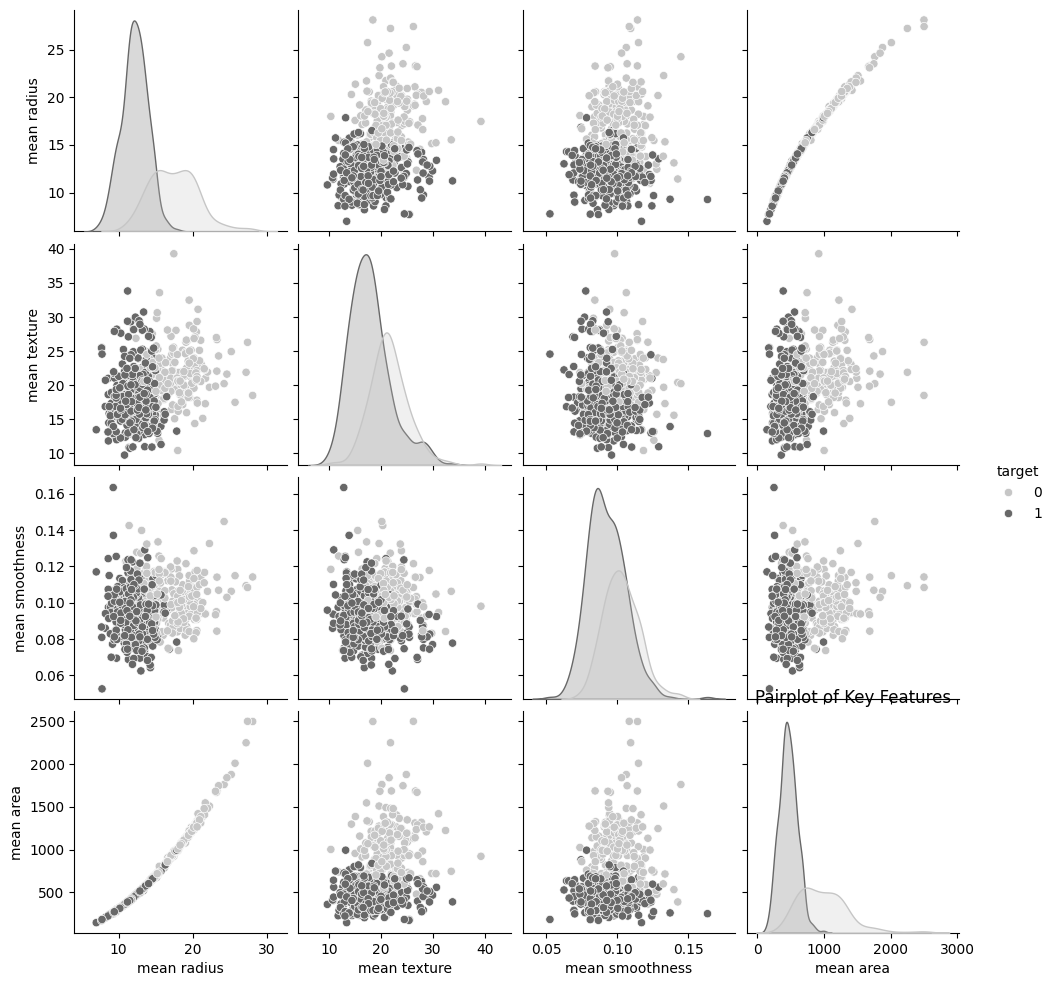

In [51]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean smoothness', 'mean area'], palette="Greys")
plt.title("Pairplot of Key Features")
plt.show()

In [52]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [53]:
X = df.drop(columns=['target'])
y = df['target']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
train_features, test_features, train_labels, test_labels = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [56]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(train_features, train_labels)


LogisticRegression(max_iter=1000, random_state=42)

In [57]:
y_pred = logreg.predict(test_features)

In [58]:
accuracy = accuracy_score(test_labels, y_pred)
conf_matrix = confusion_matrix(test_labels, y_pred)
class_report = classification_report(test_labels, y_pred)

In [59]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9736842105263158
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



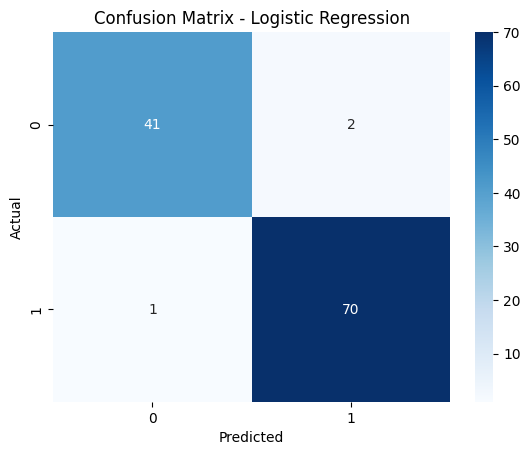

In [60]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

In [62]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [63]:
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9780219780219781


In [64]:
best_logreg = grid_search.best_estimator_
best_logreg.fit(train_features, train_labels)
y_pred_best = best_logreg.predict(test_features)

In [65]:
accuracy_best = accuracy_score(test_labels, y_pred_best)
conf_matrix_best = confusion_matrix(test_labels, y_pred_best)
class_report_best = classification_report(test_labels, y_pred_best)

In [66]:
print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(class_report_best)

Accuracy after Hyperparameter Tuning: 0.9912280701754386
Confusion Matrix:
[[42  1]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [67]:
lr_models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

In [68]:
for name, lr_model in lr_models.items():
    lr_model.fit(train_features, train_labels)
    y_pred_lr_model = lr_model.predict(test_features)
    acc = accuracy_score(test_labels, y_pred_lr_model)
    print(f"{name} Model Accuracy: {acc}")

DecisionTree Model Accuracy: 0.9473684210526315
KNN Model Accuracy: 0.9473684210526315
SVM Model Accuracy: 0.9736842105263158


In [69]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "SVM"],
    "Accuracy": [accuracy_best, accuracy_score(test_labels, lr_models["DecisionTree"].predict(test_features)),
                 accuracy_score(test_labels, lr_models["KNN"].predict(test_features)),
                 accuracy_score(test_labels, lr_models["SVM"].predict(test_features))]
})
results_df.head()

,Model,Accuracy
0,Logistic Regression,0.991228
1,Decision Tree,0.947368
2,KNN,0.947368
3,SVM,0.973684
